<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/MBA_Using_Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Retail_cleaned_dataset.xlsx to Retail_cleaned_dataset.xlsx


In [5]:
df = pd.read_excel("Retail_cleaned_dataset.xlsx")

In [6]:
df.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


Generate top receipts by countries

In [7]:
df['Country'].value_counts()

United Kingdom          700388
Germany                  16432
EIRE                     15565
France                   13511
Netherlands               5085
Spain                     3662
Belgium                   3055
Switzerland               3005
Portugal                  2356
Australia                 1789
Channel Islands           1551
Italy                     1442
Sweden                    1317
Norway                    1289
Cyprus                    1136
Finland                   1032
Austria                    922
Denmark                    778
Greece                     657
Unspecified                518
Poland                     504
Japan                      468
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     319
Malta                      282
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        122
Brazil                      94
Thailand

Plot chart for top 10 countries

In [9]:
country_set = df[['Country', 'Invoice']]
country_set = country_set.pivot_table(columns='Country', aggfunc='count')
country1 =country_set.sort_values('Invoice', axis=1, ascending=False).T.head(10)
country1

,Invoice
Country,
United Kingdom,700388
Germany,16432
EIRE,15565
France,13511
Netherlands,5085
Spain,3662
Belgium,3055
Switzerland,3005
Portugal,2356


In [10]:
country1.shape

(10, 1)

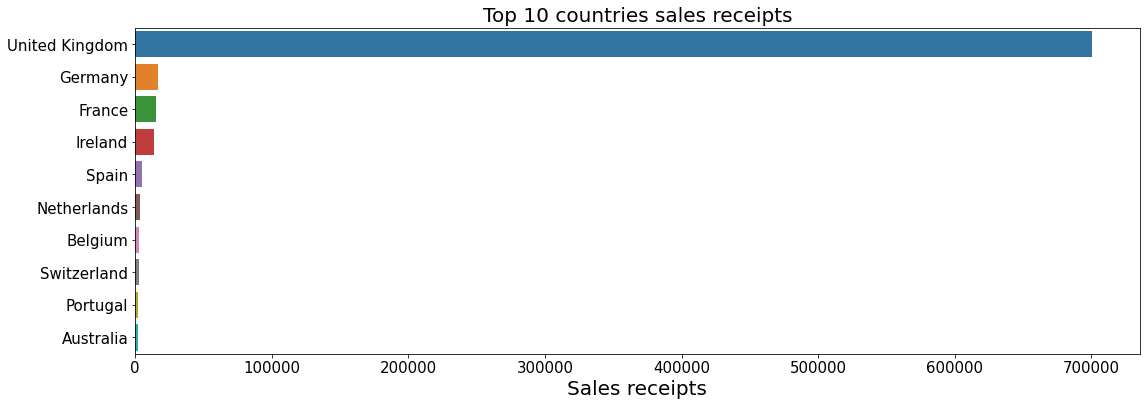

In [12]:
countries = ['United Kingdom','Germany','France','Ireland','Spain','Netherlands','Belgium','Switzerland','Portugal','Australia']
receipts = country1['Invoice']

fig, (ax) = plt.subplots(1,figsize = (18, 6))
sns.barplot(x =receipts , y = countries, ax = ax)
#ax.set_ylabel('Countries', fontsize = 20)
ax.set_xlabel('Sales receipts',fontsize = 20)
ax.tick_params(labelsize=15)
ax.set_title('Top 10 countries sales receipts', fontsize = 20)
plt.savefig("Receipts1.svg")

Generating the model for UK market

In [14]:
#Separating transactions for UK
mybasket = (df[df['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [15]:
mybasket.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item

Generating frequent datasets

In [17]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.02, use_colnames=True)

In [18]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [19]:
#viewing top 100 rules
my_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.051310,0.051579,0.025491,0.496804,9.631971,0.022845,1.884796
1,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.051579,0.051310,0.025491,0.494220,9.631971,0.022845,1.875695
2,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.052712,0.043111,0.022778,0.432127,10.023487,0.020506,1.685039
3,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.043111,0.052712,0.022778,0.528354,10.023487,0.020506,2.008474
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.071286,0.043082,0.020810,0.291928,6.776166,0.017739,1.351442
5,(JUMBO BAG STRAWBERRY),(JUMBO BAG RED RETROSPOT),0.043082,0.071286,0.020810,0.483045,6.776166,0.017739,1.796509
6,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.071286,0.048150,0.020721,0.290673,6.036827,0.017288,1.341906
7,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.048150,0.071286,0.020721,0.430341,6.036827,0.017288,1.630297
8,(LUNCH BAG CARS BLUE),(LUNCH BAG BLACK SKULL.),0.048716,0.056707,0.021138,0.433905,7.651731,0.018376,1.666315
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG CARS BLUE),0.056707,0.048716,0.021138,0.372766,7.651731,0.018376,1.516631


In [20]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.051310,0.051579,0.025491,0.496804,9.631971,0.022845,1.884796
1,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.051579,0.051310,0.025491,0.494220,9.631971,0.022845,1.875695
2,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.052712,0.043111,0.022778,0.432127,10.023487,0.020506,1.685039
3,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.043111,0.052712,0.022778,0.528354,10.023487,0.020506,2.008474
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.071286,0.043082,0.020810,0.291928,6.776166,0.017739,1.351442
5,(JUMBO BAG STRAWBERRY),(JUMBO BAG RED RETROSPOT),0.043082,0.071286,0.020810,0.483045,6.776166,0.017739,1.796509
6,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.071286,0.048150,0.020721,0.290673,6.036827,0.017288,1.341906
7,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.048150,0.071286,0.020721,0.430341,6.036827,0.017288,1.630297
8,(LUNCH BAG CARS BLUE),(LUNCH BAG BLACK SKULL.),0.048716,0.056707,0.021138,0.433905,7.651731,0.018376,1.666315
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG CARS BLUE),0.056707,0.048716,0.021138,0.372766,7.651731,0.018376,1.516631


In [21]:
my_rules1 = my_rules.sort_values(by=['lift'],ascending=False)

In [22]:
# reset index to start from #1
my_rules1.index = np.arange(1,len(my_rules)+1)

In [23]:
my_rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.049402,0.032706,0.022540,0.456246,13.949822,0.020924,1.778919
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.032706,0.049402,0.022540,0.689152,13.949822,0.020924,3.058081
3,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.051251,0.048031,0.028979,0.565445,11.772558,0.026518,2.190676
4,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.048031,0.051251,0.028979,0.603352,11.772558,0.026518,2.391917
5,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.043111,0.052712,0.022778,0.528354,10.023487,0.020506,2.008474
6,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.052712,0.043111,0.022778,0.432127,10.023487,0.020506,1.685039
7,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.051579,0.051310,0.025491,0.494220,9.631971,0.022845,1.875695
8,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.051310,0.051579,0.025491,0.496804,9.631971,0.022845,1.884796
9,(LUNCH BAG SPACEBOY DESIGN ),(LUNCH BAG BLACK SKULL.),0.050058,0.056707,0.021794,0.435378,7.677718,0.018956,1.670664
10,(LUNCH BAG BLACK SKULL.),(LUNCH BAG SPACEBOY DESIGN ),0.056707,0.050058,0.021794,0.384332,7.677718,0.018956,1.542946


In [24]:
my_rules1.to_excel("myrules.xlsx")  

In [25]:
myrules2 = my_rules.sort_values(by=['support'],ascending=False)

In [26]:
myrules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.046212,0.140157,0.032617,0.705806,5.035834,0.026140,2.922713
12,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.140157,0.046212,0.032617,0.232716,5.035834,0.026140,1.243071
17,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.051251,0.048031,0.028979,0.565445,11.772558,0.026518,2.190676
16,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.048031,0.051251,0.028979,0.603352,11.772558,0.026518,2.391917
1,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.051579,0.051310,0.025491,0.494220,9.631971,0.022845,1.875695
0,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.051310,0.051579,0.025491,0.496804,9.631971,0.022845,1.884796
3,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.043111,0.052712,0.022778,0.528354,10.023487,0.020506,2.008474
2,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.052712,0.043111,0.022778,0.432127,10.023487,0.020506,1.685039
14,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.032706,0.049402,0.022540,0.689152,13.949822,0.020924,3.058081
15,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.049402,0.032706,0.022540,0.456246,13.949822,0.020924,1.778919


In [27]:
myrules2top10 = myrules2[['antecedents','support']]

In [28]:
myrules2top10

,antecedents,support
13,(RED HANGING HEART T-LIGHT HOLDER),0.032617
12,(WHITE HANGING HEART T-LIGHT HOLDER),0.032617
17,(WOODEN FRAME ANTIQUE WHITE ),0.028979
16,(WOODEN PICTURE FRAME WHITE FINISH),0.028979
1,(HEART OF WICKER SMALL),0.025491
0,(HEART OF WICKER LARGE),0.025491
3,(LOVE BUILDING BLOCK WORD),0.022778
2,(HOME BUILDING BLOCK WORD),0.022778
14,(SWEETHEART CERAMIC TRINKET BOX),0.022540
15,(STRAWBERRY CERAMIC TRINKET BOX),0.022540


In [29]:
myrules2chart = myrules2top10.nlargest(22,'support')

In [30]:
myrules2chart

,antecedents,support
13,(RED HANGING HEART T-LIGHT HOLDER),0.032617
12,(WHITE HANGING HEART T-LIGHT HOLDER),0.032617
17,(WOODEN FRAME ANTIQUE WHITE ),0.028979
16,(WOODEN PICTURE FRAME WHITE FINISH),0.028979
1,(HEART OF WICKER SMALL),0.025491
0,(HEART OF WICKER LARGE),0.025491
3,(LOVE BUILDING BLOCK WORD),0.022778
2,(HOME BUILDING BLOCK WORD),0.022778
15,(STRAWBERRY CERAMIC TRINKET BOX),0.022540
14,(SWEETHEART CERAMIC TRINKET BOX),0.022540


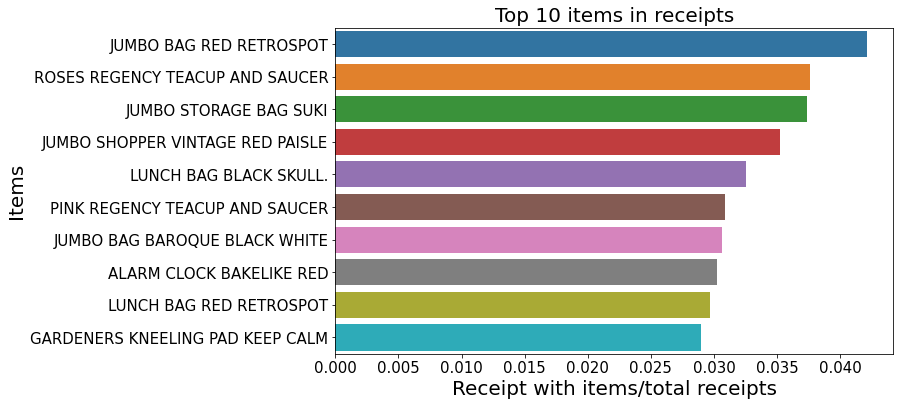

In [31]:
features = ['JUMBO BAG RED RETROSPOT','ROSES REGENCY TEACUP AND SAUCER','JUMBO STORAGE BAG SUKI','JUMBO SHOPPER VINTAGE RED PAISLE','LUNCH BAG BLACK SKULL.','PINK REGENCY TEACUP AND SAUCER','JUMBO BAG BAROQUE BLACK WHITE','ALARM CLOCK BAKELIKE RED','LUNCH BAG RED RETROSPOT','GARDENERS KNEELING PAD KEEP CALM']
importances = [0.0421,0.0376,0.0374,0.0352,0.0325,0.0309,0.0306,0.0302,0.0297,0.0290]

fig, (ax) = plt.subplots(1,figsize = (10, 6))
sns.barplot(x =importances , y = features, ax = ax)
ax.set_ylabel('Items', fontsize = 20)
ax.set_xlabel('Receipt with items/total receipts',fontsize = 20)
ax.tick_params(labelsize=15)
ax.set_title('Top 10 items in receipts', fontsize = 20)
plt.savefig("Top10itemsinreceipts.svg",bbox_inches='tight')

**Training the model**

In [32]:
dftop=my_rules1[['antecedents','consequents','consequent support','confidence','lift']]

In [33]:
dftop

,antecedents,consequents,consequent support,confidence,lift
1,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.032706,0.456246,13.949822
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.049402,0.689152,13.949822
3,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.048031,0.565445,11.772558
4,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.051251,0.603352,11.772558
5,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.052712,0.528354,10.023487
6,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.043111,0.432127,10.023487
7,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.051310,0.494220,9.631971
8,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.051579,0.496804,9.631971
9,(LUNCH BAG SPACEBOY DESIGN ),(LUNCH BAG BLACK SKULL.),0.056707,0.435378,7.677718
10,(LUNCH BAG BLACK SKULL.),(LUNCH BAG SPACEBOY DESIGN ),0.050058,0.384332,7.677718


**Looking at other min_support**

In [34]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.015, use_colnames=True)

In [35]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [36]:
#viewing top 100 rules
my_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.047256,0.031573,0.015384,0.325552,10.310993,0.013892,1.435881
1,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.031573,0.047256,0.015384,0.487252,10.310993,0.013892,1.858115
2,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.030053,0.047256,0.015563,0.517857,10.958641,0.014143,1.976062
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.047256,0.030053,0.015563,0.329338,10.958641,0.014143,1.446252
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047256,0.041800,0.019558,0.413880,9.901536,0.017583,1.634820
5,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.041800,0.047256,0.019558,0.467903,9.901536,0.017583,1.790546
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.029814,0.027369,0.018127,0.608000,22.214519,0.017311,2.481200
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.027369,0.029814,0.018127,0.662309,22.214519,0.017311,2.873002
8,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.074655,0.140157,0.018544,0.248403,1.772319,0.008081,1.144021
9,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.140157,0.074655,0.018544,0.132312,1.772319,0.008081,1.066449


In [37]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.047256,0.031573,0.015384,0.325552,10.310993,0.013892,1.435881
1,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.031573,0.047256,0.015384,0.487252,10.310993,0.013892,1.858115
2,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.030053,0.047256,0.015563,0.517857,10.958641,0.014143,1.976062
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.047256,0.030053,0.015563,0.329338,10.958641,0.014143,1.446252
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047256,0.041800,0.019558,0.413880,9.901536,0.017583,1.634820
...,...,...,...,...,...,...,...,...,...
83,(WOODEN FRAME ANTIQUE WHITE ),(WHITE HANGING HEART T-LIGHT HOLDER),0.051251,0.140157,0.019648,0.383362,2.735239,0.012464,1.394406
84,(WOODEN PICTURE FRAME WHITE FINISH),(WHITE HANGING HEART T-LIGHT HOLDER),0.048031,0.140157,0.019588,0.407821,2.909749,0.012856,1.451999
85,(WHITE HANGING HEART T-LIGHT HOLDER),(WOODEN PICTURE FRAME WHITE FINISH),0.140157,0.048031,0.019588,0.139757,2.909749,0.012856,1.106629
86,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.048031,0.051251,0.028979,0.603352,11.772558,0.026518,2.391917


In [38]:
my_rules.sort_values(by=['lift'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.024686,0.019737,0.016398,0.664251,33.655060,0.015911,2.919632
16,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.019737,0.024686,0.016398,0.830816,33.655060,0.015911,5.764801
75,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.019737,0.027429,0.015712,0.796073,29.022900,0.015171,4.769199
74,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.027429,0.019737,0.015712,0.572826,29.022900,0.015171,2.294763
19,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.024686,0.027429,0.019618,0.794686,28.972351,0.018941,4.736992
...,...,...,...,...,...,...,...,...,...
32,(HOME BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.052712,0.140157,0.017203,0.326357,2.328516,0.009815,1.276409
28,(HEART OF WICKER SMALL),(WHITE HANGING HEART T-LIGHT HOLDER),0.051579,0.140157,0.016487,0.319653,2.280682,0.009258,1.263831
29,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER SMALL),0.140157,0.051579,0.016487,0.117635,2.280682,0.009258,1.074862
9,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.140157,0.074655,0.018544,0.132312,1.772319,0.008081,1.066449


In [39]:
top10rules = my_rules.sort_values(by=['lift'],ascending=False)

In [40]:
top10rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.024686,0.019737,0.016398,0.664251,33.655060,0.015911,2.919632
16,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.019737,0.024686,0.016398,0.830816,33.655060,0.015911,5.764801
75,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.019737,0.027429,0.015712,0.796073,29.022900,0.015171,4.769199
74,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.027429,0.019737,0.015712,0.572826,29.022900,0.015171,2.294763
19,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.024686,0.027429,0.019618,0.794686,28.972351,0.018941,4.736992
...,...,...,...,...,...,...,...,...,...
32,(HOME BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.052712,0.140157,0.017203,0.326357,2.328516,0.009815,1.276409
28,(HEART OF WICKER SMALL),(WHITE HANGING HEART T-LIGHT HOLDER),0.051579,0.140157,0.016487,0.319653,2.280682,0.009258,1.263831
29,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER SMALL),0.140157,0.051579,0.016487,0.117635,2.280682,0.009258,1.074862
9,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.140157,0.074655,0.018544,0.132312,1.772319,0.008081,1.066449


In [41]:
top10rules.index = np.arange(1,len(top10rules)+1)

In [42]:
top10rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.024686,0.019737,0.016398,0.664251,33.655060,0.015911,2.919632
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.019737,0.024686,0.016398,0.830816,33.655060,0.015911,5.764801
3,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.019737,0.027429,0.015712,0.796073,29.022900,0.015171,4.769199
4,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.027429,0.019737,0.015712,0.572826,29.022900,0.015171,2.294763
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.024686,0.027429,0.019618,0.794686,28.972351,0.018941,4.736992
...,...,...,...,...,...,...,...,...,...
84,(HOME BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.052712,0.140157,0.017203,0.326357,2.328516,0.009815,1.276409
85,(HEART OF WICKER SMALL),(WHITE HANGING HEART T-LIGHT HOLDER),0.051579,0.140157,0.016487,0.319653,2.280682,0.009258,1.263831
86,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER SMALL),0.140157,0.051579,0.016487,0.117635,2.280682,0.009258,1.074862
87,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.140157,0.074655,0.018544,0.132312,1.772319,0.008081,1.066449


In [43]:
df = top10rules

In [44]:
df.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
79,(HEART OF WICKER LARGE),(WHITE HANGING HEART T-LIGHT HOLDER),0.051310,0.140157,0.019171,0.373620,2.665728,0.011979,1.372718
80,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER LARGE),0.140157,0.051310,0.019171,0.136779,2.665728,0.011979,1.099012
81,(LOVE BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.043111,0.140157,0.015831,0.367220,2.620065,0.009789,1.358834
82,(WHITE HANGING HEART T-LIGHT HOLDER),(LOVE BUILDING BLOCK WORD),0.140157,0.043111,0.015831,0.112955,2.620065,0.009789,1.078737
83,(WHITE HANGING HEART T-LIGHT HOLDER),(HOME BUILDING BLOCK WORD),0.140157,0.052712,0.017203,0.122740,2.328516,0.009815,1.079826
84,(HOME BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.052712,0.140157,0.017203,0.326357,2.328516,0.009815,1.276409
85,(HEART OF WICKER SMALL),(WHITE HANGING HEART T-LIGHT HOLDER),0.051579,0.140157,0.016487,0.319653,2.280682,0.009258,1.263831
86,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER SMALL),0.140157,0.051579,0.016487,0.117635,2.280682,0.009258,1.074862
87,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.140157,0.074655,0.018544,0.132312,1.772319,0.008081,1.066449
88,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.074655,0.140157,0.018544,0.248403,1.772319,0.008081,1.144021


**Making recommendations**

In [45]:
my_basket_sets['LUNCH BAG RED RETROSPOT'].sum()

1337

In [46]:
my_basket_sets['WHITE HANGING HEART T-LIGHT HOLDER'].sum()

4701

In [47]:
my_basket_sets['JUMBO BAG RED RETROSPOT'].sum()

2391

In [48]:
mybasket2 = (my_basket_sets['JUMBO BAG RED RETROSPOT']&my_basket_sets['WHITE HANGING HEART T-LIGHT HOLDER'])

In [49]:
mybasket2.value_counts()

0    33119
1      422
dtype: int64

In [50]:
mybasket1 = (my_basket_sets['JUMBO BAG RED RETROSPOT']&my_basket_sets['LUNCH BAG RED RETROSPOT'])

In [51]:
mybasket1.value_counts()

0    33080
1      461
dtype: int64

In [52]:
mybasket.groupby(by=["JUMBO BAG RED RETROSPOT","12 COLOURED PARTY BALLOONS"])

In [53]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 1) &
       (my_rules['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.047256,0.031573,0.015384,0.325552,10.310993,0.013892,1.435881
1,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.031573,0.047256,0.015384,0.487252,10.310993,0.013892,1.858115
2,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.030053,0.047256,0.015563,0.517857,10.958641,0.014143,1.976062
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.047256,0.030053,0.015563,0.329338,10.958641,0.014143,1.446252
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047256,0.041800,0.019558,0.413880,9.901536,0.017583,1.634820
...,...,...,...,...,...,...,...,...,...
81,(VINTAGE SNAP CARDS),(VINTAGE HEADS AND TAILS CARD GAME ),0.041651,0.027906,0.016517,0.396564,14.210636,0.015355,1.610931
83,(WOODEN FRAME ANTIQUE WHITE ),(WHITE HANGING HEART T-LIGHT HOLDER),0.051251,0.140157,0.019648,0.383362,2.735239,0.012464,1.394406
84,(WOODEN PICTURE FRAME WHITE FINISH),(WHITE HANGING HEART T-LIGHT HOLDER),0.048031,0.140157,0.019588,0.407821,2.909749,0.012856,1.451999
86,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.048031,0.051251,0.028979,0.603352,11.772558,0.026518,2.391917


In [54]:
frequent_itemsets = apriori(my_basket_sets, min_support = 0.013, use_colnames = True)

In [55]:
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]

In [56]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   451 non-null    float64
 1   itemsets  451 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.2+ KB


In [57]:
top_items = frequent_itemsets[:10]

In [58]:
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [59]:
top_items

,support,itemsets
0,0.013506,['12 PENCIL SMALL TUBE WOODLAND']
1,0.019469,['12 PENCILS SMALL TUBE SKULL']
2,0.014043,['12 PENCILS TALL TUBE SKULLS']
3,0.018574,['3 HEARTS HANGING DECORATION RUSTIC']
4,0.015116,['3 HOOK PHOTO SHELF ANTIQUE WHITE']
5,0.020214,['3 STRIPEY MICE FELTCRAFT']
6,0.015623,['4 TRADITIONAL SPINNING TOPS']
7,0.035300,['6 RIBBONS RUSTIC CHARM']
8,0.021824,['60 CAKE CASES VINTAGE CHRISTMAS']
9,0.047256,['60 TEATIME FAIRY CAKE CASES']


Text(0, 0.5, 'Support')

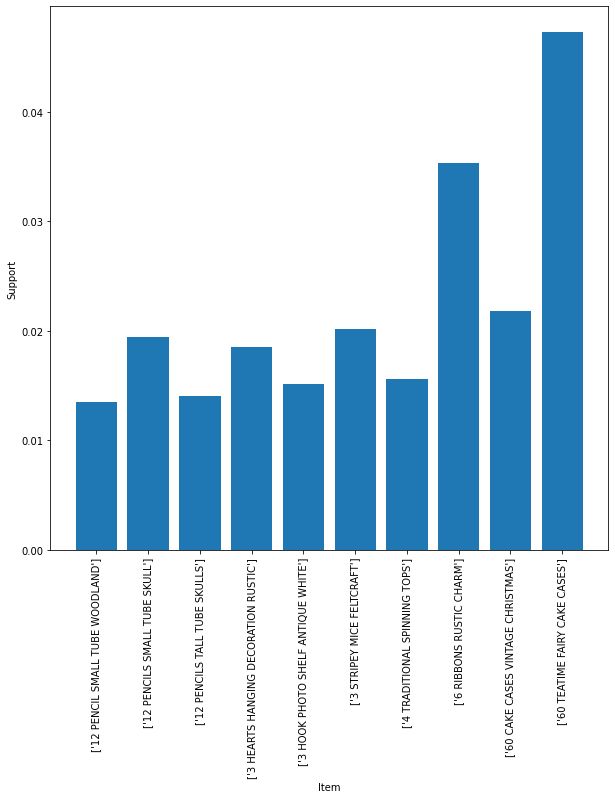

In [60]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

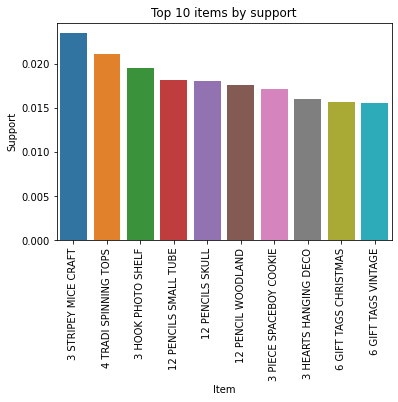

In [61]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

dicti=({'3 STRIPEY MICE CRAFT':0.023469,'4 TRADI SPINNING TOPS':0.021160,'3 HOOK PHOTO SHELF':0.019495,'12 PENCILS SMALL TUBE':0.018206,'12 PENCILS SKULL':0.018099,'12 PENCIL WOODLAND':0.017562,'3 PIECE SPACEBOY COOKIE':0.017186,'3 HEARTS HANGING DECO':0.016004,'6 GIFT TAGS CHRISTMAS':0.015682,'6 GIFT TAGS VINTAGE' :0.015521})

pd_df = pd.DataFrame(list(dicti.items()))
pd_df.columns =["Item","Support"]

# Here the dataframe is already sorted if not use the below line
# pd_df = pd_df.sort_values('Count').reset_index()
# or 
# pd_df = pd_df.sort_values('Count',ascending=False).reset_index()

sns.barplot(x='Item',y='Support',data=pd_df,order = pd_df['Item']).set_title('Top 10 items by support')
plt.xticks(rotation=90)